# End-to-End Exploratory Data Analysis (EDA) of Iris Dataset

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the Iris dataset, covering data loading, cleaning, descriptive statistics, and various visualizations to understand the dataset's structure and relationships between features and species.

In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [11]:
# 2. Load Data
df = pd.read_csv('iris.csv')
print("Data loaded successfully!")

Data loaded successfully!


## 3. Initial Data Inspection

In [12]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nDataset Shape:")
print(df.shape)

print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Dataset Shape:
(150, 5)

Descriptive Statistics:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data Cleaning

In [13]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
print("\nDuplicates removed. New shape:")
print(df.shape)

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Number of duplicate rows:
3

Duplicates removed. New shape:
(147, 5)


## 5. Univariate Analysis: Feature Distributions

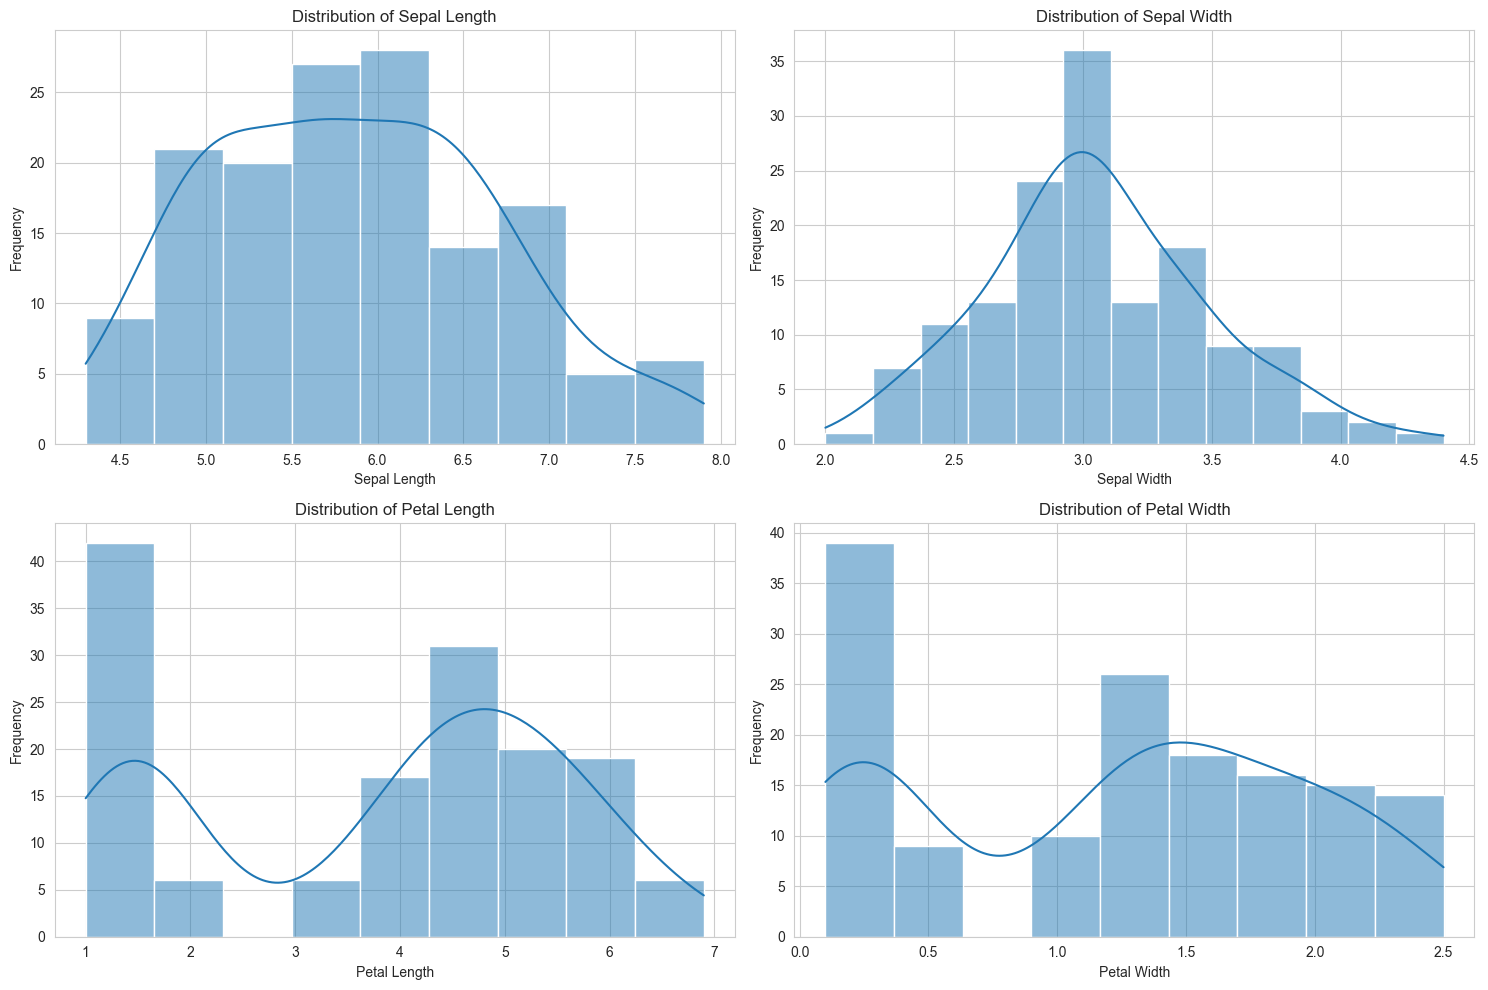

In [14]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 6. Bivariate Analysis: Relationships between Features

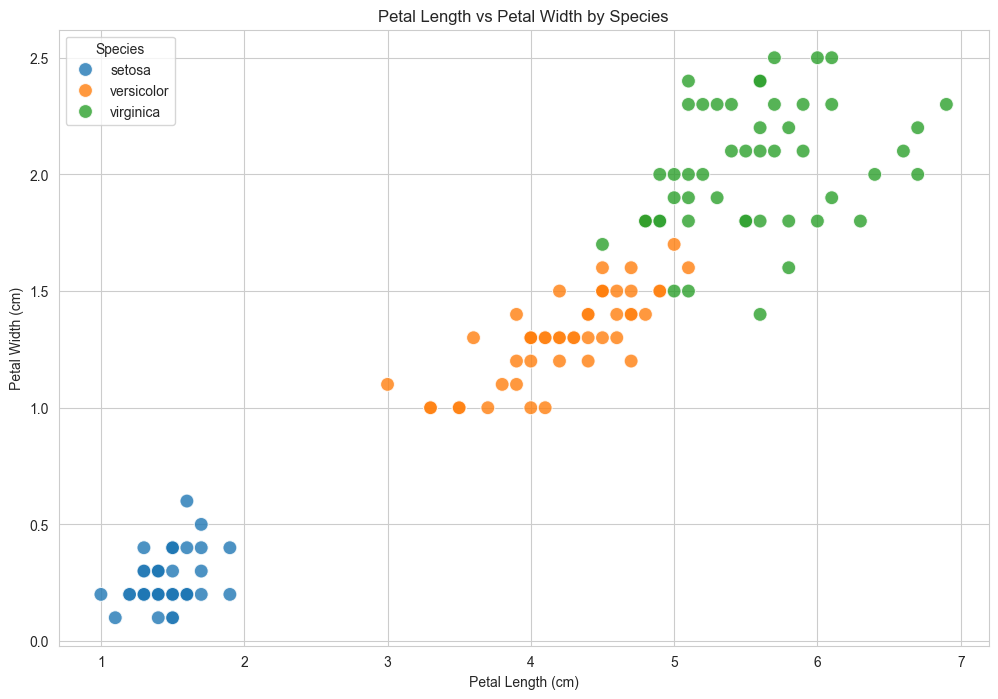

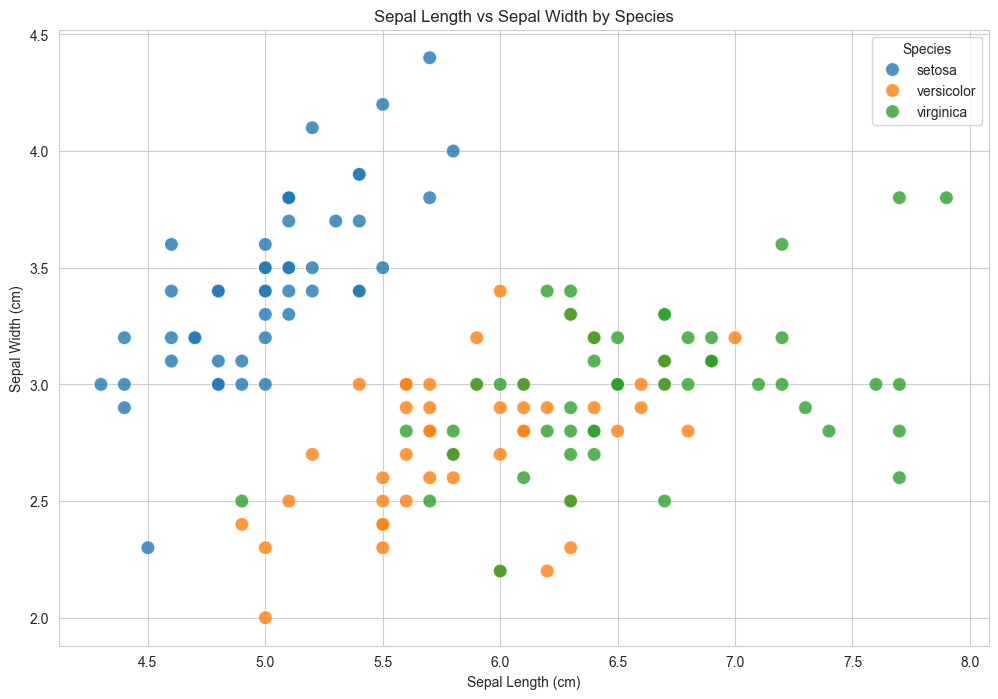

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, s=100, alpha=0.8)
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, s=100, alpha=0.8)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

## 7. Correlation Analysis

Correlation Matrix:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


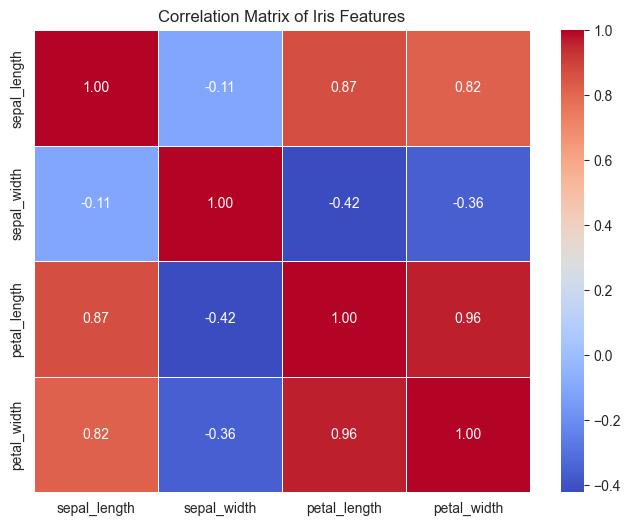

In [16]:
correlation_matrix = df[features].corr()
print("Correlation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

## 8. Multivariate Analysis: Pair Plot

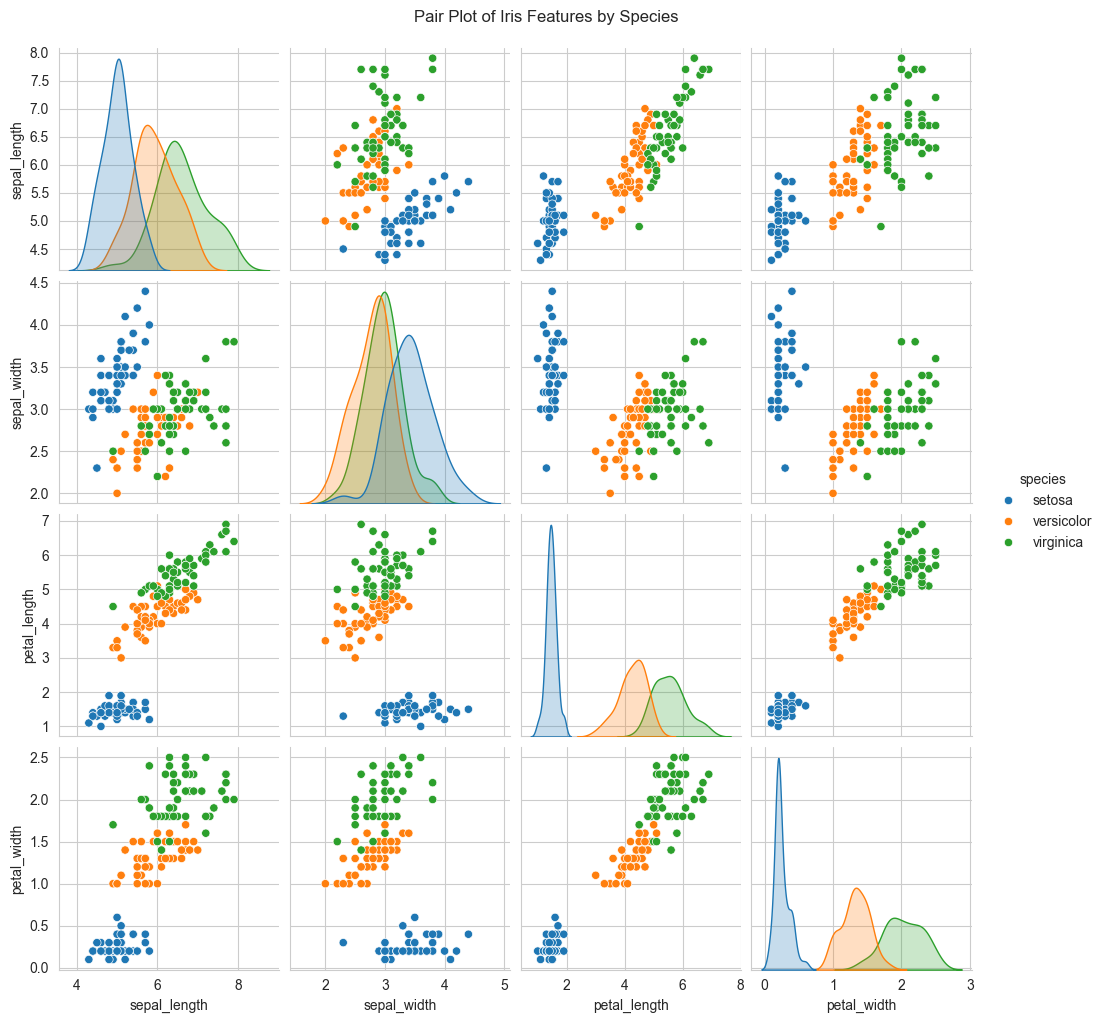

In [17]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02) # Adjust title position
plt.show()

## 9. Species-wise Analysis

Value counts for each species:
species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

Descriptive statistics per species:


sepal_length                                               \
                  count      mean       std  min  25%  50%  75%  max   
species                                                                
setosa             48.0  5.010417  0.359219  4.3  4.8  5.0  5.2  5.8   
versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
virginica          49.0  6.604082  0.632113  4.9  6.3  6.5  6.9  7.9   

           sepal_width            ... petal_length      petal_width            \
                 count      mean  ...          75%  max       count      mean   
species                           ...                                           
setosa            48.0  3.431250  ...          1.6  1.9        48.0  0.250000   
versicolor        50.0  2.770000  ...          4.6  5.1        50.0  1.326000   
virginica         49.0  2.979592  ...          5.9  6.9        49.0  2.028571   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105185  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.276887  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

<Figure size 1500x800 with 0 Axes>

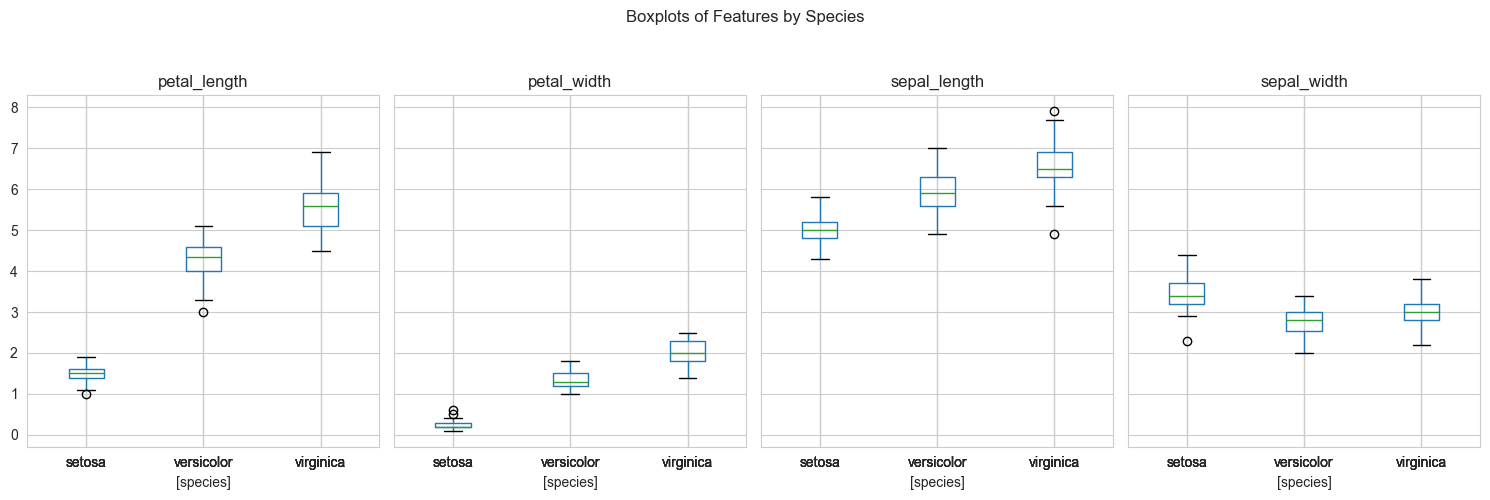

In [18]:
print("Value counts for each species:")
print(df['species'].value_counts())

print("\nDescriptive statistics per species:")
display(df.groupby('species')[features].describe())

plt.figure(figsize=(15, 8))
df.boxplot(by='species', layout=(1, 4), figsize=(15, 5))
plt.suptitle('Boxplots of Features by Species', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## 10. Conclusion and Key Findings

Based on this EDA, here are some key observations:

- **Species Separation:** Petal length and petal width are the most effective features for distinguishing between the Iris species. Setosa is clearly separable from Versicolor and Virginica based on these features, while there is some overlap between Versicolor and Virginica.
- **Feature Distributions:** Most features exhibit a relatively normal distribution, though some skewness can be observed, particularly in petal dimensions.
- **Correlations:** Strong positive correlations exist between petal length and petal width, and also between sepal length and petal length/width. Sepal width shows a weaker or even negative correlation with other features.
- **Outliers:** Boxplots indicate a few potential outliers, particularly in sepal width for Setosa, but these are generally minor and may not significantly impact modeling.